### The Three Components:

P (Proportional): Reacts to current error

I (Integral): Reacts to accumulation of past errors

D (Derivative): Predicts future errors based on rate of change


### Basic Equation:

u(t) = K_p*e(t) + K_i∫e(t)dt + K_d*de(t)/dt

Where:

u(t) = control signal

e(t) = error (setpoint - process variable)

K_p, K_i, K_d = tuning parameters

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
class PIDController:
    def __init__(self, Kp, Ki, Kd):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.prev_error = 0
        self.integral = 0
        
    def compute(self, setpoint, pv, dt):
        error = setpoint - pv
        
        # Proportional term
        P = self.Kp * error
        
        # Integral term
        self.integral += error * dt
        I = self.Ki * self.integral
        
        # Derivative term
        derivative = (error - self.prev_error) / dt
        D = self.Kd * derivative
        
        # Save error for next derivative calculation
        self.prev_error = error
        
        # Compute output
        output = P + I + D
        
        return output

In [42]:
# Simulation parameters
dt = 0.1  # time step
total_time = 10.0
steps = int(total_time / dt)

# System model (simple first-order system)
def system_model(x, u, dt):
    # Simple system: dx/dt = -x + u
    return x + (-x + u) * dt

# PID controller
pid = PIDController(Kp=6, Ki=7.5, Kd=0.1)

# Simulation
setpoint = 5.0
pv = 0.0  # process variable
time = np.arange(0, total_time, dt)
output = np.zeros_like(time)

for i in range(1, len(time)):
    control = pid.compute(setpoint, pv, dt)
    pv = system_model(pv, control, dt)
    output[i] = pv

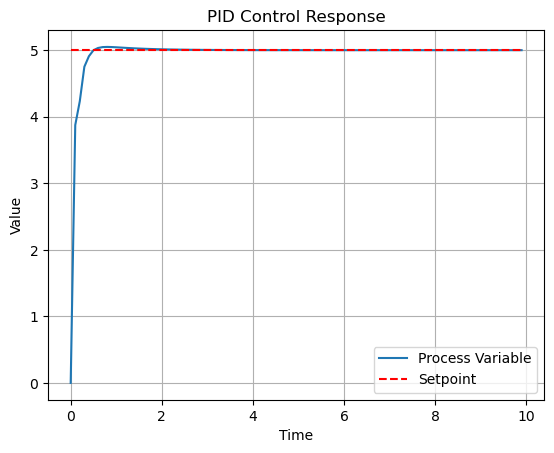

In [43]:
# Plot results
plt.plot(time, output, label='Process Variable')
plt.plot(time, [setpoint]*len(time), 'r--', label='Setpoint')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('PID Control Response')
plt.legend()
plt.grid(True)
plt.show()